In [1]:
! pip install transformers torch bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
from transformers import BertTokenizer, BertModel
from bertviz import model_view

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

text = "the cat sat on the mat"

input = tokenizer(text, return_tensors='pt')
output = model(**input)

attention = output.attentions
tokens = tokenizer.convert_ids_to_tokens(input['input_ids'][0])
model_view(attention, tokens)



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSelfAttention.forward`.
  return forward_call(*args, **kwargs)


<IPython.core.display.Javascript object>

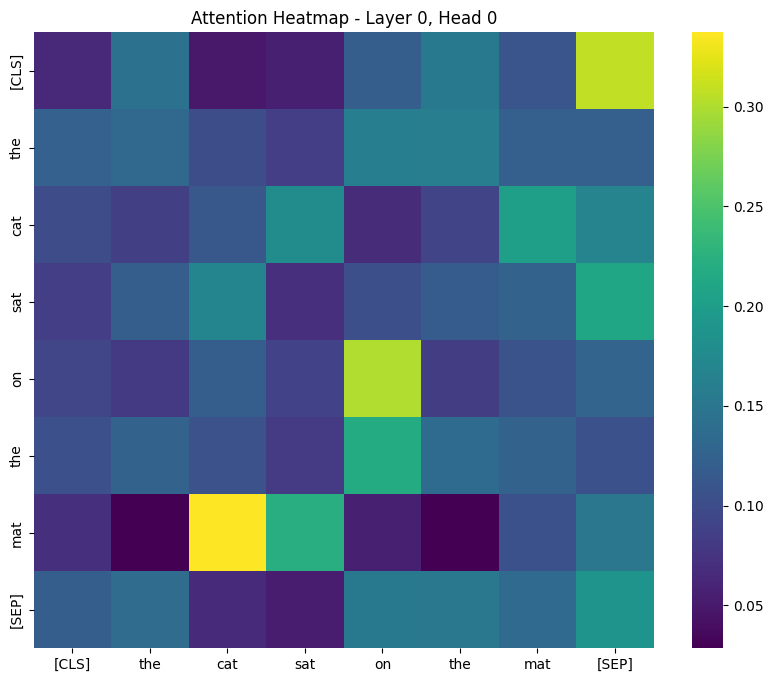

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

layer = 0
head = 0
attn = attention[layer][0][head].detach().numpy()  # (tokens, tokens)

plt.figure(figsize=(10, 8))
sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
plt.title(f"Attention Heatmap - Layer {layer}, Head {head}")
plt.show()


In [8]:
attn

array([[0.06315482, 0.14339443, 0.04793344, 0.05540069, 0.12014469,
        0.15318896, 0.10936511, 0.3074179 ],
       [0.1231268 , 0.13175525, 0.10043256, 0.08480165, 0.1593029 ,
        0.15855293, 0.12094679, 0.12108113],
       [0.09857056, 0.08521797, 0.11271292, 0.17734821, 0.06624245,
        0.09035519, 0.20119086, 0.16836184],
       [0.08512801, 0.11986274, 0.1695832 , 0.06989941, 0.10254487,
        0.11712722, 0.12456893, 0.21128558],
       [0.09311872, 0.08016278, 0.11961999, 0.08914243, 0.30078456,
        0.08315696, 0.10776912, 0.1262455 ],
       [0.10440166, 0.1248223 , 0.10604664, 0.08236846, 0.21757632,
        0.13526292, 0.12484063, 0.10468113],
       [0.07166268, 0.02882309, 0.3372586 , 0.22177105, 0.05560819,
        0.02848483, 0.10517069, 0.15122084],
       [0.11932402, 0.13629846, 0.06502049, 0.05144721, 0.15345752,
        0.15185693, 0.13380992, 0.18878536]], dtype=float32)